# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV

Classification report for model Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



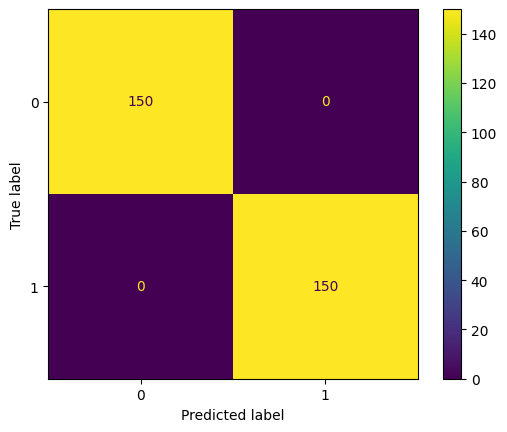

Classification report for model SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



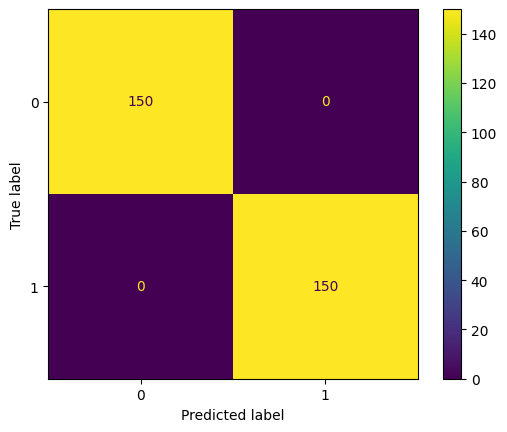

Classification report for model k-NN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



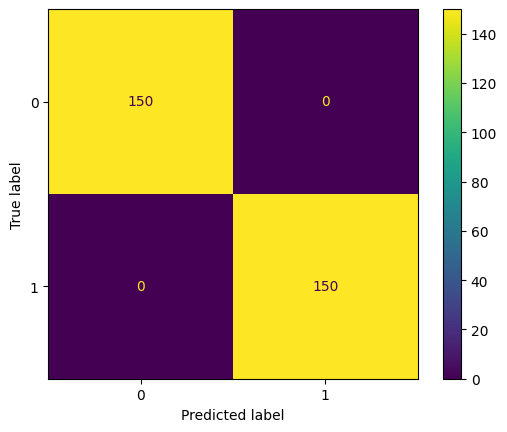

In [10]:


data = pd.read_csv('../lab_2/task_1.csv')

X = data[['x', 'y']].values
y = LabelEncoder().fit_transform(data['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(kernel='linear', probability=True),
    'k-NN': KNeighborsClassifier(n_neighbors=5)
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    report = classification_report(y_test, y_pred)

    print(f"Classification report for model {name}")
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1])
    cm_display.plot()
    plt.show()



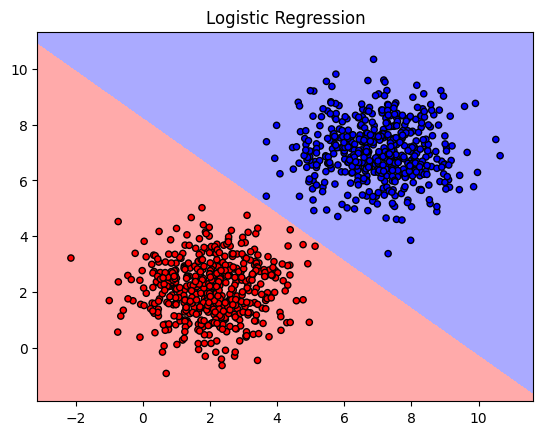

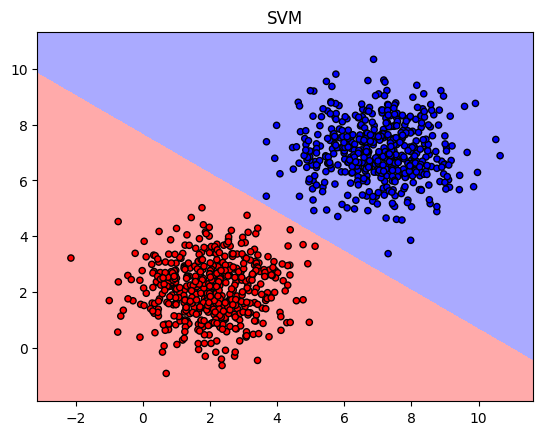

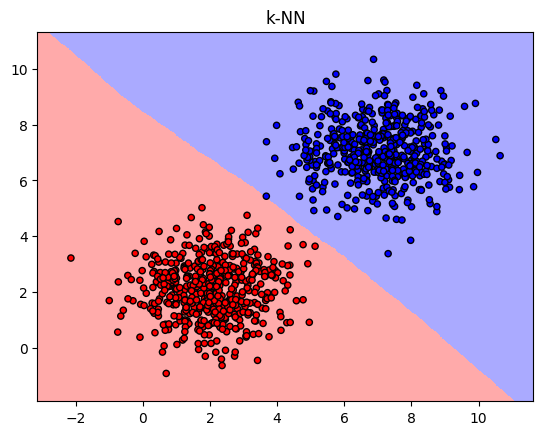

In [11]:

def plot_decision_boundary(model, X, y, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ['#FF0000', '#0000FF']
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=20)
    plt.title(title)
    plt.show()

for name, model in models.items():
    plot_decision_boundary(model, X, y, name)


**Аналіз отриманих результатів**:

1. За результатами метрик точності, всі моделі показали високу точність, а саме 100%, тому що дані є лінійно роздільні і модельки можуть легко класифікувати дані.



**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


Classification report for model Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.96      0.98        83
           1       0.96      0.93      0.94       111
           2       0.91      0.99      0.95        76

    accuracy                           0.96       270
   macro avg       0.95      0.96      0.96       270
weighted avg       0.96      0.96      0.96       270



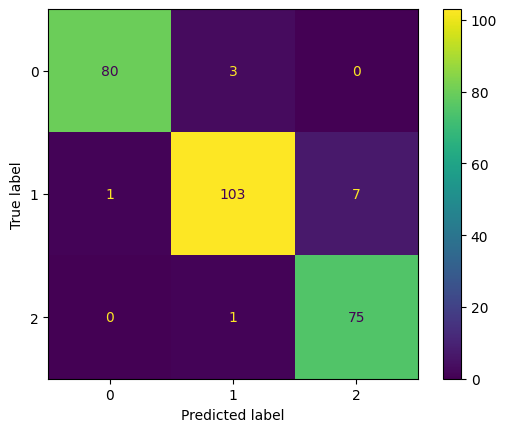

Classification report for model SVM
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        83
           1       0.95      0.93      0.94       111
           2       0.91      0.99      0.95        76

    accuracy                           0.95       270
   macro avg       0.95      0.96      0.95       270
weighted avg       0.95      0.95      0.95       270



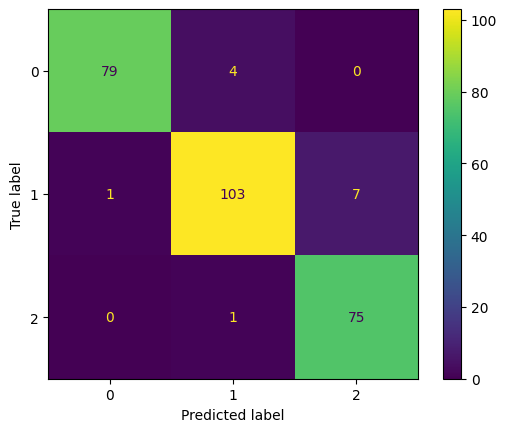

Classification report for model k-NN
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        83
           1       0.94      0.94      0.94       111
           2       0.91      0.99      0.95        76

    accuracy                           0.95       270
   macro avg       0.95      0.95      0.95       270
weighted avg       0.95      0.95      0.95       270



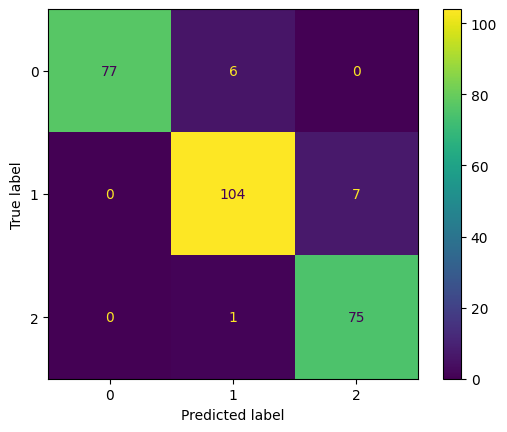

In [18]:

data = pd.read_csv('../lab_2/task_2.csv')

X = data[['x', 'y']].values
y = LabelEncoder().fit_transform(data['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(kernel='rbf', C=1.0, gamma='scale'),
    'k-NN': KNeighborsClassifier(n_neighbors=5)
}


for name, model in models.items():
    clf = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    report = classification_report(y_test, y_pred)

    print(f"Classification report for model {name}")
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = clf.classes_)
    cm_display.plot()
    plt.show()



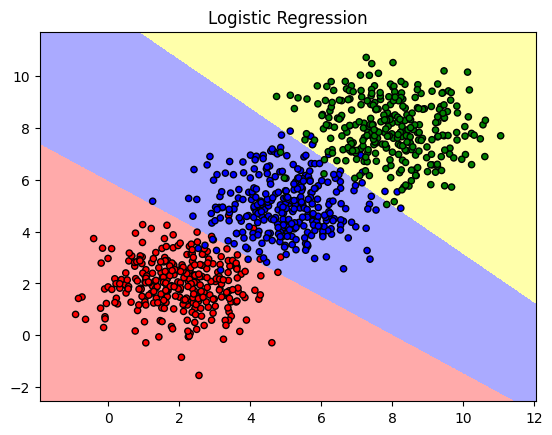

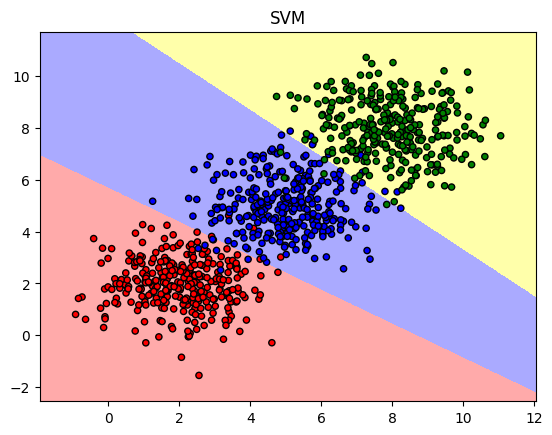

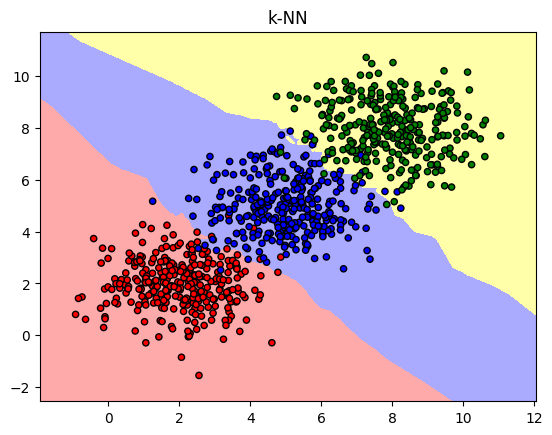

In [16]:

def plot_decision_boundary(model, X, y, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#FFAF'])
    cmap_bold = ['#FF0000', '#0000FF', '#008000']
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=20)
    plt.title(title)
    plt.show()

for name, model in models.items():
    plot_decision_boundary(model, X, y, name)

**Аналіз отриманих результатів**:

Найкраще показала себе KNN моделька з результатом 96% точності. Дві інші модельки також показал високу точність а саме 95%. Результат модельок можливо пов'язаний з тим, що перекриття даних не є значним, і тому всі вони справляються з класифікацією чудово

1.   KNN чутливий до перекриття між класами, особливо для малих значень K. Коли класи перекриваються, KNN може призвести до значних помилок, тому що класифікація залежить від найближчих сусідів.

Для покращення результатів у випадках перекриття, можна використовувати більші значення K, які можуть зменшити вплив шуму та помилкових класифікацій.

2.    Логістична регресія створює лінійну межу розділу, яка може бути недостатньою для точного класифікування даних з перекриттям, особливо якщо класи мають складні, нелінійні межі.

3.   SVM з лінійним ядром також може показувати обмежену продуктивність при значному перекритті класів, оскільки він створює лінійну межу розділу. Однак, SVM з нелінійними ядрами (наприклад, RBF) може адаптуватися до складних меж і краще справлятися з перекриттям.



**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [19]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


Classification report for model SVM (RBF Kernel)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



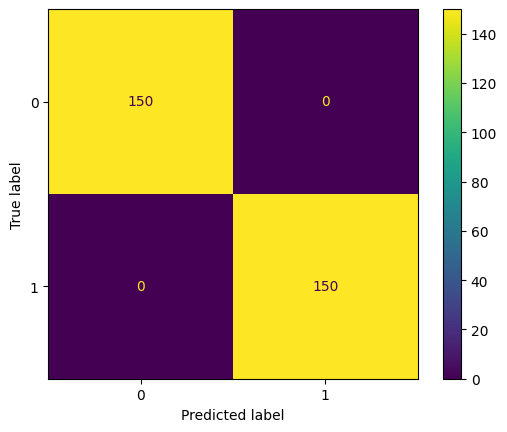

Classification report for model Random Forest
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       150
           1       0.99      1.00      0.99       150

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



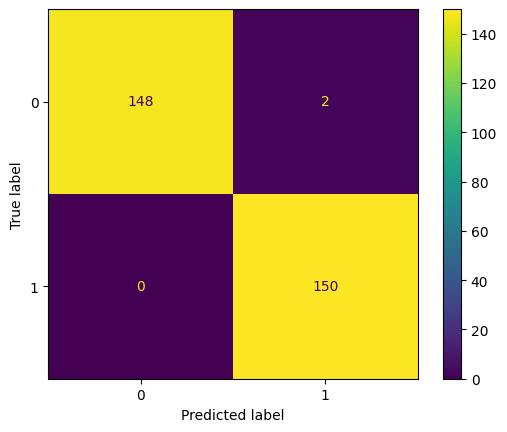

Classification report for model k-NN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



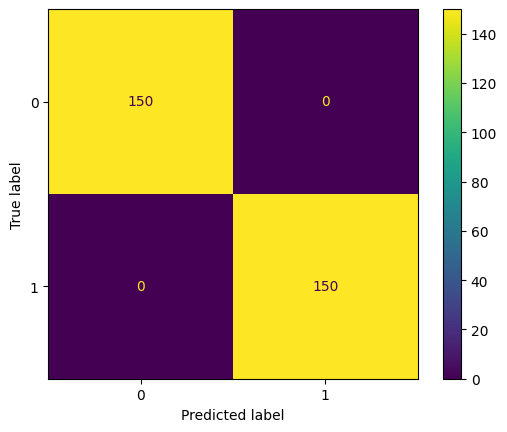

In [27]:

data = pd.read_csv('../lab_2/torus_data.csv');


X = data[['x', 'y']].values
y = LabelEncoder().fit_transform(data['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


models = {
    'SVM (RBF Kernel)': SVC(kernel='rbf', C=1.0, gamma='scale'),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10),
    'k-NN': KNeighborsClassifier(n_neighbors=5)
}

results = {}
for name, model in models.items():
    clf = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    report = classification_report(y_test, y_pred)

    print(f"Classification report for model {name}")
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = clf.classes_)
    cm_display.plot()
    plt.show()



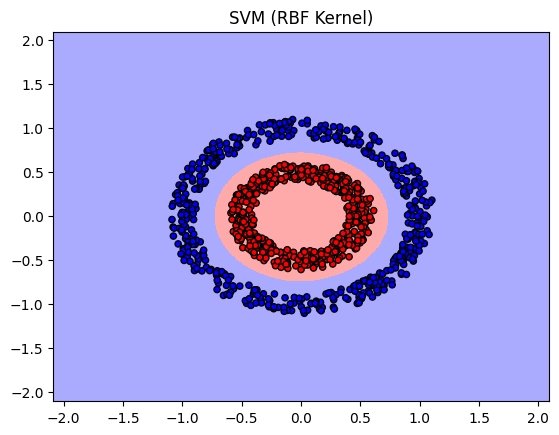

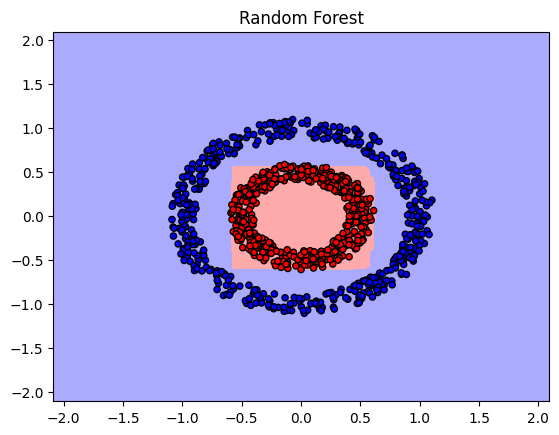

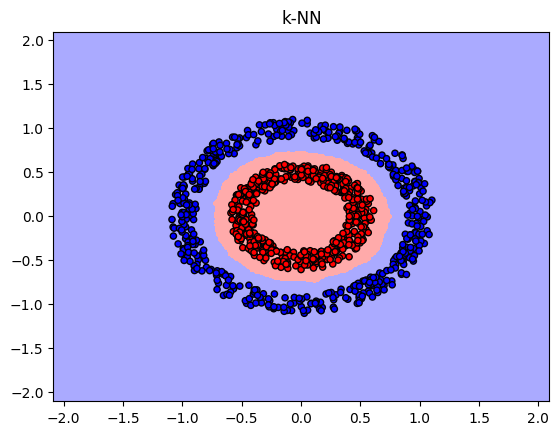

In [25]:

def plot_decision_boundary(model, X, y, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ['#FF0000', '#0000FF']
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=20)
    plt.title(title)
    plt.show()

for name, model in models.items():
    plot_decision_boundary(model, X, y, name)

**Аналіз отриманих результатів**:

Для класифікації даних, де один тор утворює тор в інишх я використав такі модельки SMV з rbf ядром, KNN, Random Forest. Всі модельки показали високу точність 99 - 100%. Найкраще впоралися SVM з rbf ядром та KNN.

RBF ядро дозволяє SVM створювати нелінійні межі між класами. Це досягається через перетворення вхідних даних в більш високий простір вимірювань, де можливо знайти лінійну межу розділення.

В KNN класифікація відбувається на основі відстаней між обєктми. Це робить KNN гнучким для адаптації до складних форм межі розділу.

Random Forest є  методом, який комбінує результати багатьох рішень дерев для отримання фінального рішення. Це дозволяє моделі адаптуватися до складних і варіативних даних.

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [34]:

data = pd.read_csv('../lab_2/task_4_spiral.csv')

X = data[['x', 'y']].values
y = LabelEncoder().fit_transform(data['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 100, 'gamma': 1}


Classification report for model SVM (RBF Kernel)
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       150
           1       0.98      1.00      0.99       150

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



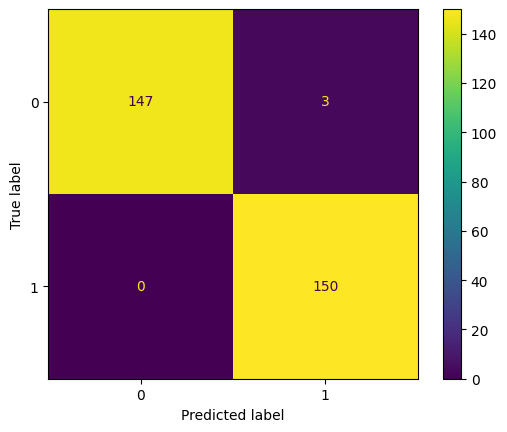

Classification report for model Random Forest
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       150
           1       0.96      1.00      0.98       150

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



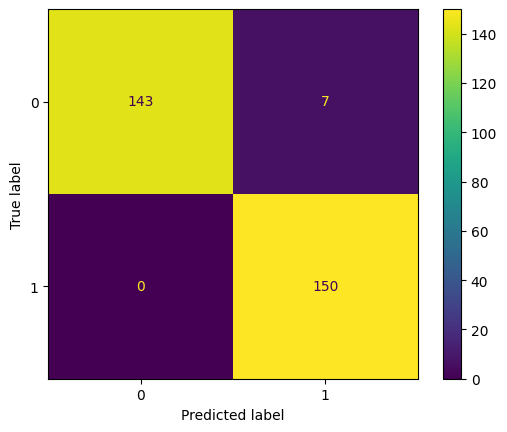

Classification report for model k-NN
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       150
           1       0.99      0.99      0.99       150

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



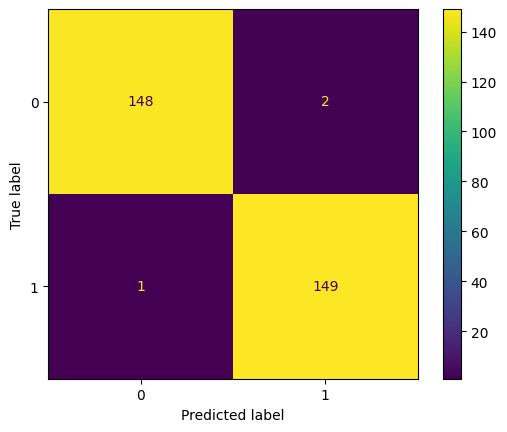

In [35]:
models = {
    'SVM (RBF Kernel)': SVC(kernel='rbf', C= grid_search.best_params_['C'], gamma= grid_search.best_params_['gamma']),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10),
    'k-NN': KNeighborsClassifier(n_neighbors=5)
}


for name, model in models.items():
    clf = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    report = classification_report(y_test, y_pred)

    print(f"Classification report for model {name}")
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = clf.classes_)
    cm_display.plot()
    plt.show()


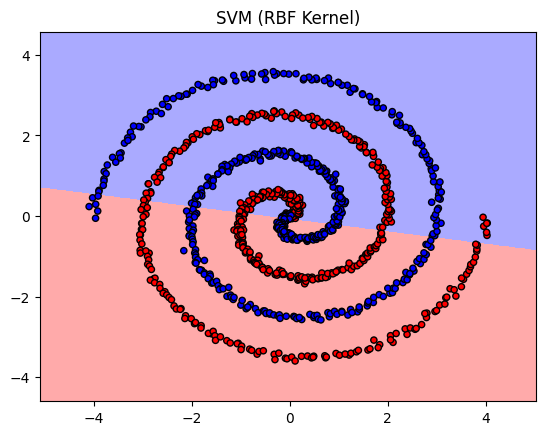

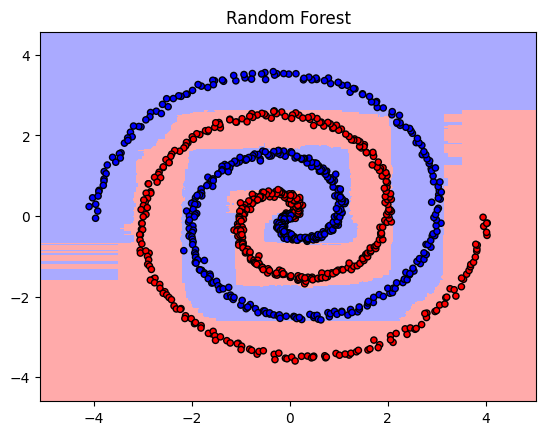

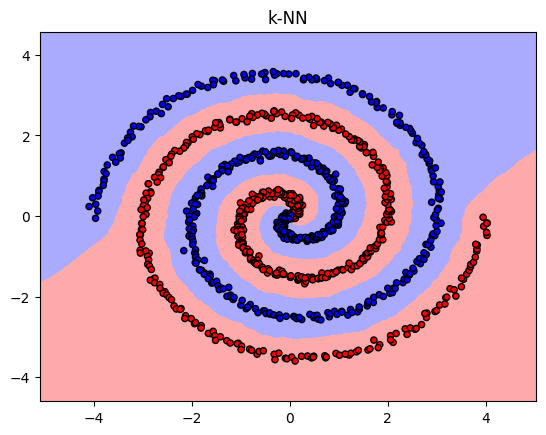

In [30]:

def plot_decision_boundary(model, X, y, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ['#FF0000', '#0000FF']
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=20)
    plt.title(title)
    plt.show()

for name, model in models.items():
    plot_decision_boundary(model, X, y, name)

**Аналіз отриманих результатів**:

1.   Для класифікації даних, які утоворюють подвійну спіраль, я використав такі методи як KNN, Randorm Forest, SVM з rbf kernel.
2.   Найкраще себе показали такі модельки як KNN, та Random Forest з точністю 99% та 98%. Для того щоб SVM з ядром rbf показав високі результати потрібно було визначати параметри С та gamma. Для цього я використав метод GridSearchCV, який тестує набір різних параметрів на SVM і визначає параметри, при яких моделька досягає найбільшої точності, в даному випадку точність досягла 99%, що є одни з найбільших результатів.

На мою думку найкраще підходить метод Random Forest та KNN, оскільки вони не потребують додаткових налаштувань незалежно від структури даних.

Random Forest може добре впоратися з нелінійними межами рішення завдяки своїй здатності враховувати складні взаємозв'язки між ознаками через різні дерева.

KNN добре справляється з нелінійними межами рішення, оскільки не припускає жодної форми межі рішення. Це дозволяє йому відмінно класифікувати складні, нелінійні структури даних, як подвійна спіраль.

SVM - вимагає додаткох налаштувань таких як ядро залежно від лінійності даних, а також налаштування та визначення параметрів С та gamma при ядрі rbf.